# SARIMAX Exercise

Roadmap for SARIMAX analysis

### 1. Get the dataset

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/fellmir/pyTimeSeriesDataAnalysis/main/input_data/Renewable_Energy_and_Electricity_Demand.csv'
df = pd.read_csv(url)

### 2. Examine the dataset

In [2]:
df.head()

,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
0,0,2019-01-01-T00:00,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
1,1,2019-01-01-T00:05,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2,2,2019-01-01-T00:10,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
3,3,2019-01-01-T00:15,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
4,4,2019-01-01-T00:20,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963


In [3]:
df.tail()

,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
315643,315643,2021-12-31-T23:35,4,4,0.0,0.0,0.0,1.64,64.898,5.68,-33,3778,22939
315644,315644,2021-12-31-T23:40,4,4,0.0,0.0,0.0,1.64,64.970,5.66,-32,3755,22855
315645,315645,2021-12-31-T23:45,4,4,0.0,0.0,0.0,1.64,65.042,5.64,-31,3751,22812
315646,315646,2021-12-31-T23:50,4,4,0.0,0.0,0.0,1.64,65.234,5.60,-32,3793,22723
315647,315647,2021-12-31-T23:55,4,4,0.0,0.0,0.0,1.62,65.308,5.58,-32,3801,22662


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       315648 non-null  int64  
 1   Time             315648 non-null  object 
 2   Season           315648 non-null  int64  
 3   Day_of_the_week  315648 non-null  int64  
 4   DHI              315648 non-null  float64
 5   DNI              315648 non-null  float64
 6   GHI              315648 non-null  float64
 7   Wind_speed       315648 non-null  float64
 8   Humidity         315648 non-null  float64
 9   Temperature      315648 non-null  float64
 10  PV_production    315648 non-null  int64  
 11  Wind_production  315648 non-null  int64  
 12  Electric_demand  315648 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 31.3+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,315648.0,157823.500000,91119.873222,0.000,78911.75,157823.500,236735.250,315647.000
Season,315648.0,2.508212,1.117189,1.000,2.00,3.000,4.000,4.000
Day_of_the_week,315648.0,2.998175,1.997720,0.000,1.00,3.000,5.000,6.000
DHI,315648.0,53.779907,68.829995,0.000,0.00,7.600,98.800,431.000
DNI,315648.0,288.058615,336.057040,0.000,0.00,38.000,601.600,999.800
GHI,315648.0,221.787985,296.632914,0.000,0.00,10.200,427.200,1058.200
Wind_speed,315648.0,2.545759,1.042771,0.660,1.76,2.340,3.160,8.540
Humidity,315648.0,51.261462,16.319826,11.572,38.38,51.662,63.644,88.688
Temperature,315648.0,17.472179,7.701694,-0.540,11.20,16.700,22.800,39.020
PV_production,315648.0,3555.139722,4371.602324,-145.000,-34.00,110.000,7952.000,13191.000


### 3. Preprocessing

In [6]:
df = df.drop(columns=['Unnamed: 0', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'PV_production', 'Wind_production'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             315648 non-null  object 
 1   Season           315648 non-null  int64  
 2   Day_of_the_week  315648 non-null  int64  
 3   Humidity         315648 non-null  float64
 4   Temperature      315648 non-null  float64
 5   Electric_demand  315648 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 14.4+ MB


In [8]:
df.isna().sum()

Time               0
Season             0
Day_of_the_week    0
Humidity           0
Temperature        0
Electric_demand    0
dtype: int64

In [9]:
df['Time'] = pd.to_datetime(df['Time'])

In [10]:
df.head()

,Time,Season,Day_of_the_week,Humidity,Temperature,Electric_demand
0,2019-01-01 00:00:00,1,1,56.036,1.82,22216
1,2019-01-01 00:05:00,1,1,56.036,1.82,22106
2,2019-01-01 00:10:00,1,1,56.194,1.78,22130
3,2019-01-01 00:15:00,1,1,56.344,1.74,22040
4,2019-01-01 00:20:00,1,1,56.440,1.72,21963


In [11]:
df.tail()

,Time,Season,Day_of_the_week,Humidity,Temperature,Electric_demand
315643,2021-12-31 23:35:00,4,4,64.898,5.68,22939
315644,2021-12-31 23:40:00,4,4,64.970,5.66,22855
315645,2021-12-31 23:45:00,4,4,65.042,5.64,22812
315646,2021-12-31 23:50:00,4,4,65.234,5.60,22723
315647,2021-12-31 23:55:00,4,4,65.308,5.58,22662


In [12]:
df.set_index('Time', inplace=True)

In [13]:
df.head()

,Season,Day_of_the_week,Humidity,Temperature,Electric_demand
Time,,,,,
2019-01-01 00:00:00,1,1,56.036,1.82,22216
2019-01-01 00:05:00,1,1,56.036,1.82,22106
2019-01-01 00:10:00,1,1,56.194,1.78,22130
2019-01-01 00:15:00,1,1,56.344,1.74,22040
2019-01-01 00:20:00,1,1,56.440,1.72,21963


In [14]:
df.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:05:00',
               '2019-01-01 00:10:00', '2019-01-01 00:15:00',
               '2019-01-01 00:20:00', '2019-01-01 00:25:00',
               '2019-01-01 00:30:00', '2019-01-01 00:35:00',
               '2019-01-01 00:40:00', '2019-01-01 00:45:00',
               ...
               '2021-12-31 23:10:00', '2021-12-31 23:15:00',
               '2021-12-31 23:20:00', '2021-12-31 23:25:00',
               '2021-12-31 23:30:00', '2021-12-31 23:35:00',
               '2021-12-31 23:40:00', '2021-12-31 23:45:00',
               '2021-12-31 23:50:00', '2021-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Time', length=315648, freq=None)

In [15]:
df = df.asfreq('5T')

In [16]:
df.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:05:00',
               '2019-01-01 00:10:00', '2019-01-01 00:15:00',
               '2019-01-01 00:20:00', '2019-01-01 00:25:00',
               '2019-01-01 00:30:00', '2019-01-01 00:35:00',
               '2019-01-01 00:40:00', '2019-01-01 00:45:00',
               ...
               '2021-12-31 23:10:00', '2021-12-31 23:15:00',
               '2021-12-31 23:20:00', '2021-12-31 23:25:00',
               '2021-12-31 23:30:00', '2021-12-31 23:35:00',
               '2021-12-31 23:40:00', '2021-12-31 23:45:00',
               '2021-12-31 23:50:00', '2021-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Time', length=315648, freq='5T')

### 4. Visualise the dataset

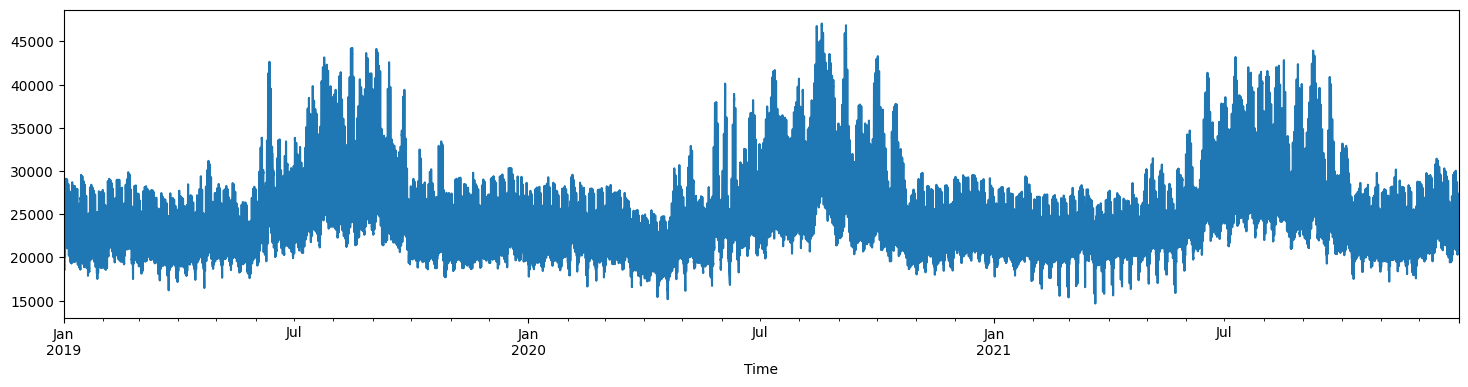

In [17]:
import matplotlib.pyplot as plt

df['Electric_demand'].plot(figsize=(18,4));

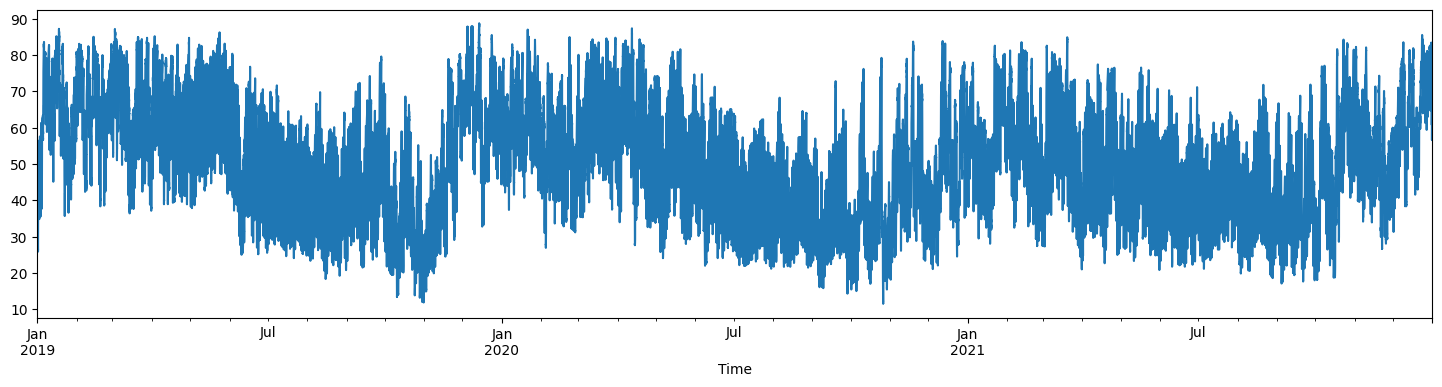

In [18]:
df['Humidity'].plot(figsize=(18,4));

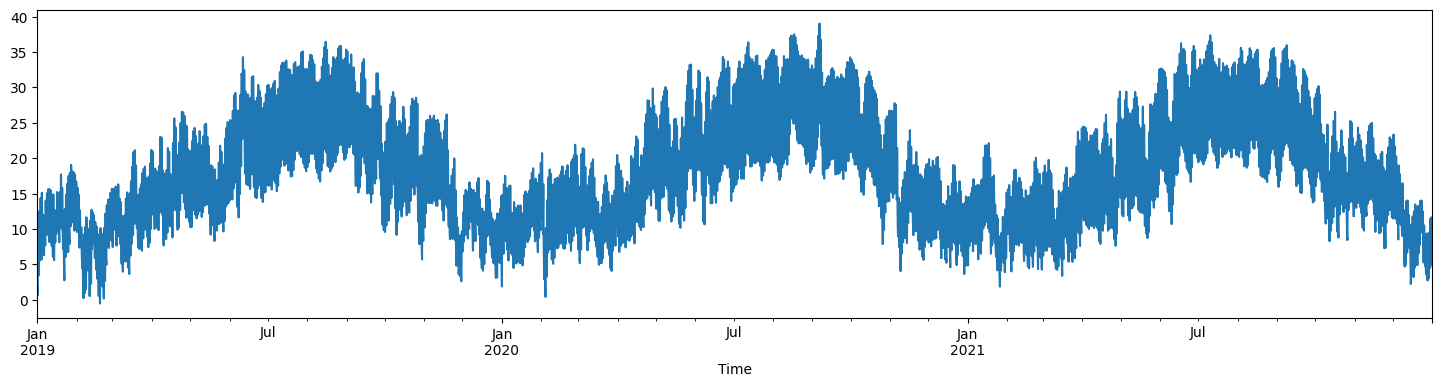

In [19]:
df['Temperature'].plot(figsize=(18,4));

### 5. Exploratory data analysis

In [20]:
import seaborn as sns
from pandas.plotting import lag_plot

<Axes: title={'center': 'Electric Demand per Day'}, xlabel='Time', ylabel='Electric_demand'>

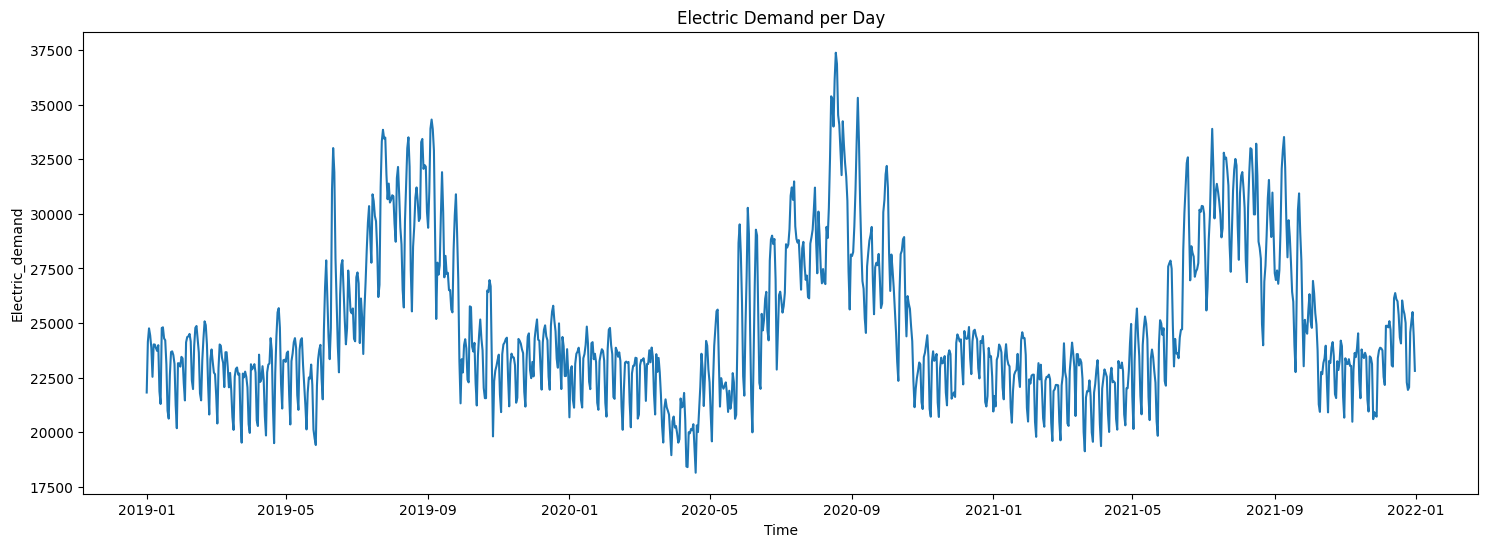

In [21]:
y = df['Electric_demand'].resample('D').mean()

plt.figure(figsize=(18,6))
plt.title("Electric Demand per Day")
sns.lineplot(data=y)

<Axes: title={'center': 'Average Temperature per Day'}, xlabel='Time', ylabel='Temperature'>

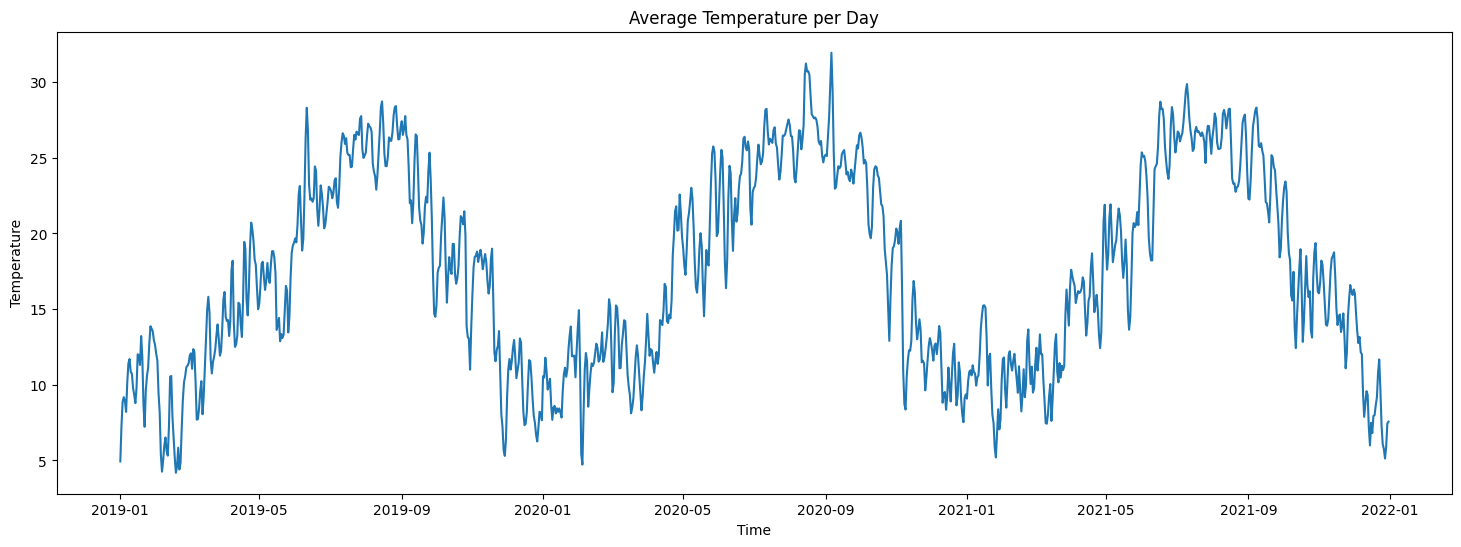

In [22]:
t = df['Temperature'].resample('D').mean()

plt.figure(figsize=(18,6))
plt.title("Average Temperature per Day")
sns.lineplot(data=t)

<Axes: title={'center': 'Average Humidity per Day'}, xlabel='Time', ylabel='Humidity'>

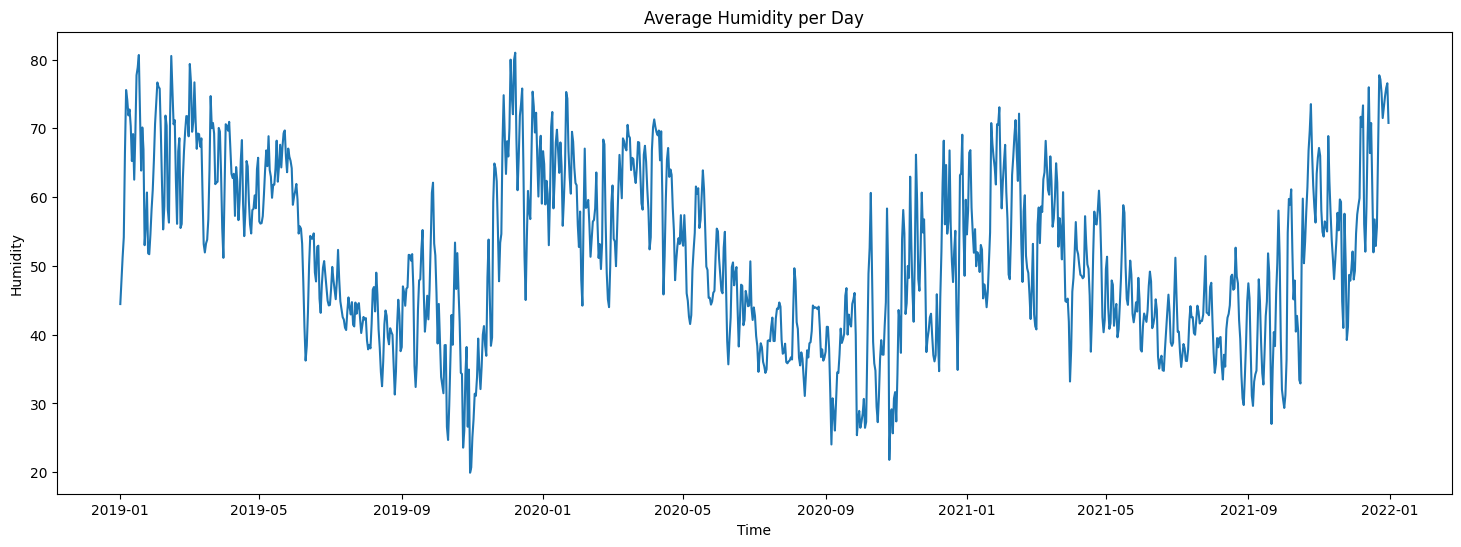

In [23]:
h = df['Humidity'].resample('D').mean()

plt.figure(figsize=(18,6))
plt.title("Average Humidity per Day")
sns.lineplot(data=h)

<Axes: title={'center': 'Electric Demand Histogram'}, xlabel='Electric_demand', ylabel='Count'>

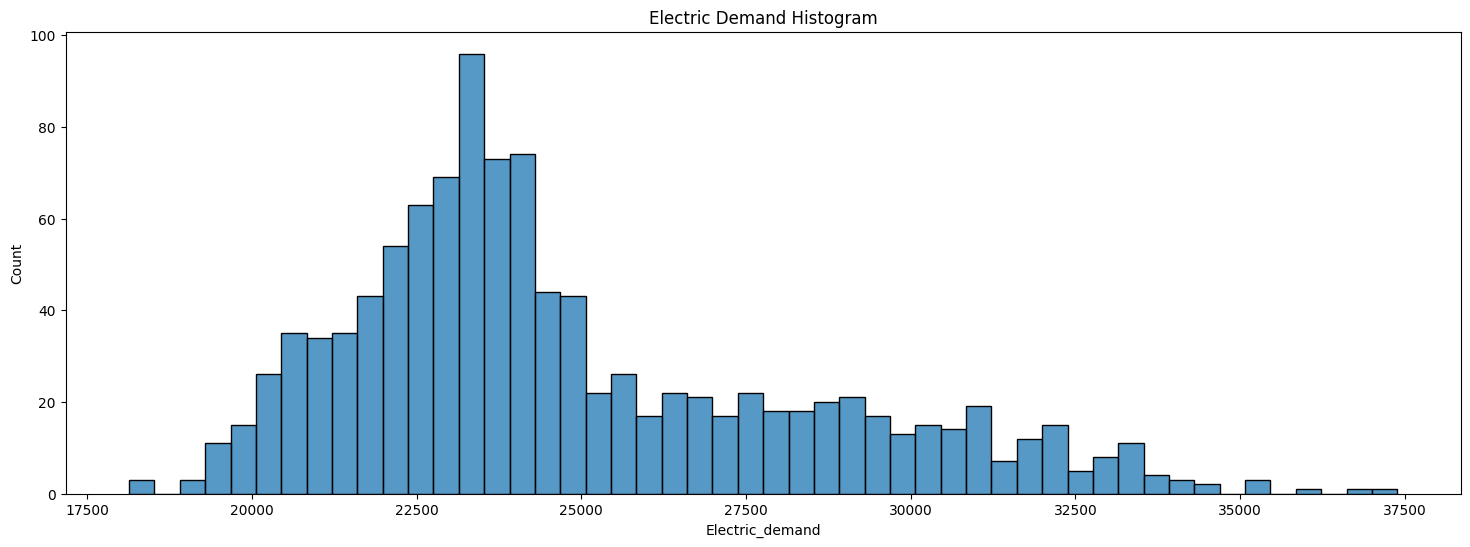

In [24]:
plt.figure(figsize=(18,6))
plt.title("Electric Demand Histogram")
sns.histplot(y, bins=50)

Text(0, 0.5, 'Electric Demand')

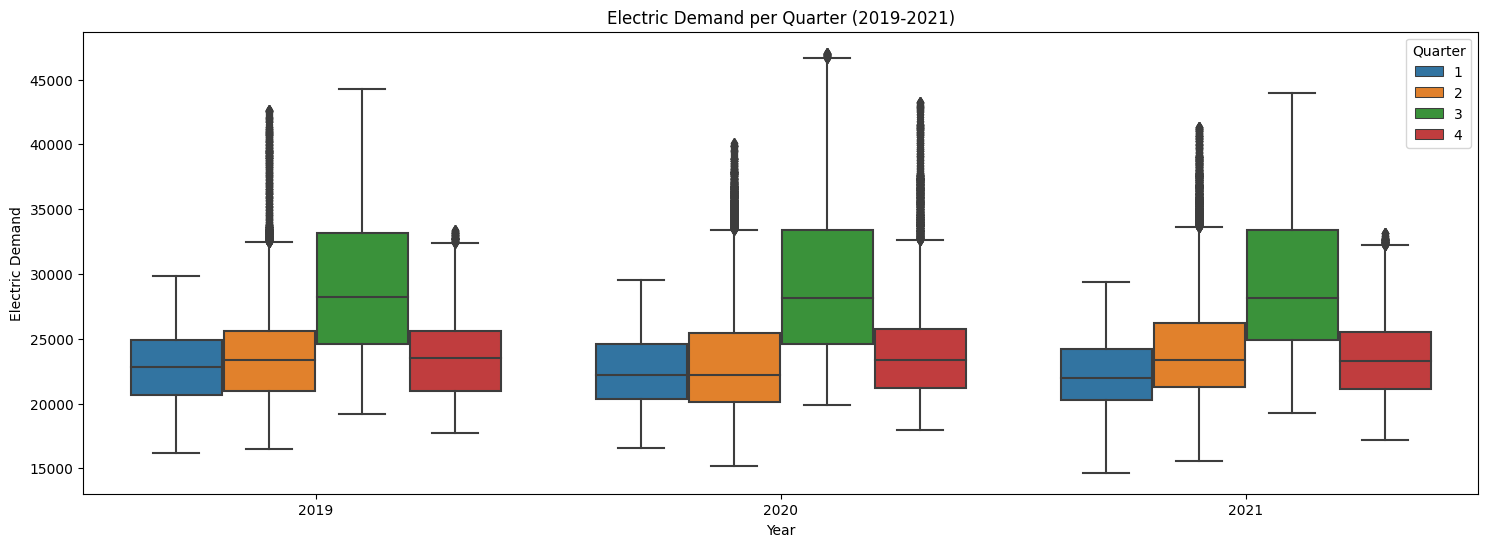

In [25]:
df['Quarter'] = df.index.quarter

df['Year'] = df.index.year

plt.figure(figsize=(18,6))
sns.boxplot(x='Year', y='Electric_demand', hue='Quarter', data=df)
plt.title('Electric Demand per Quarter (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Electric Demand')

<Axes: title={'center': 'Heatmap of Correlation Matrix'}>

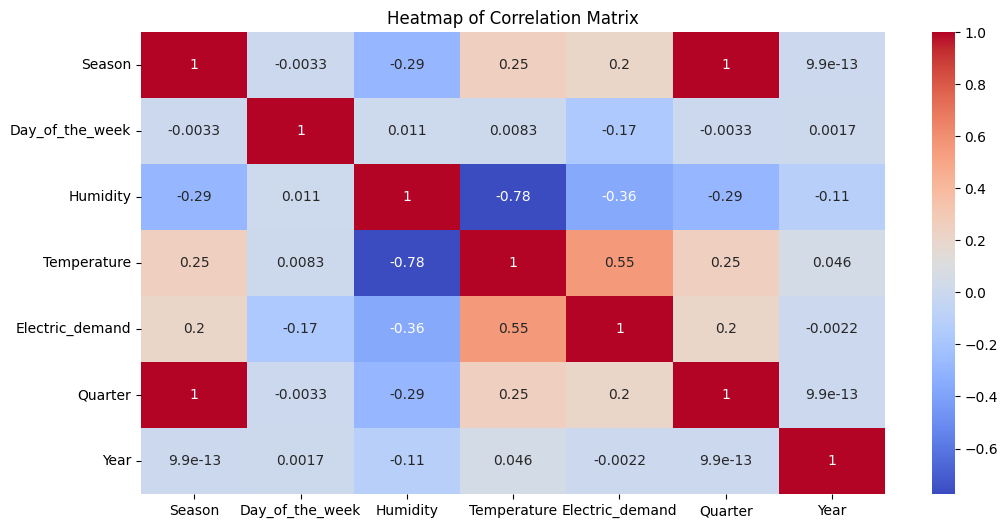

In [26]:
plt.figure(figsize=(12,6))
plt.title("Heatmap of Correlation Matrix")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

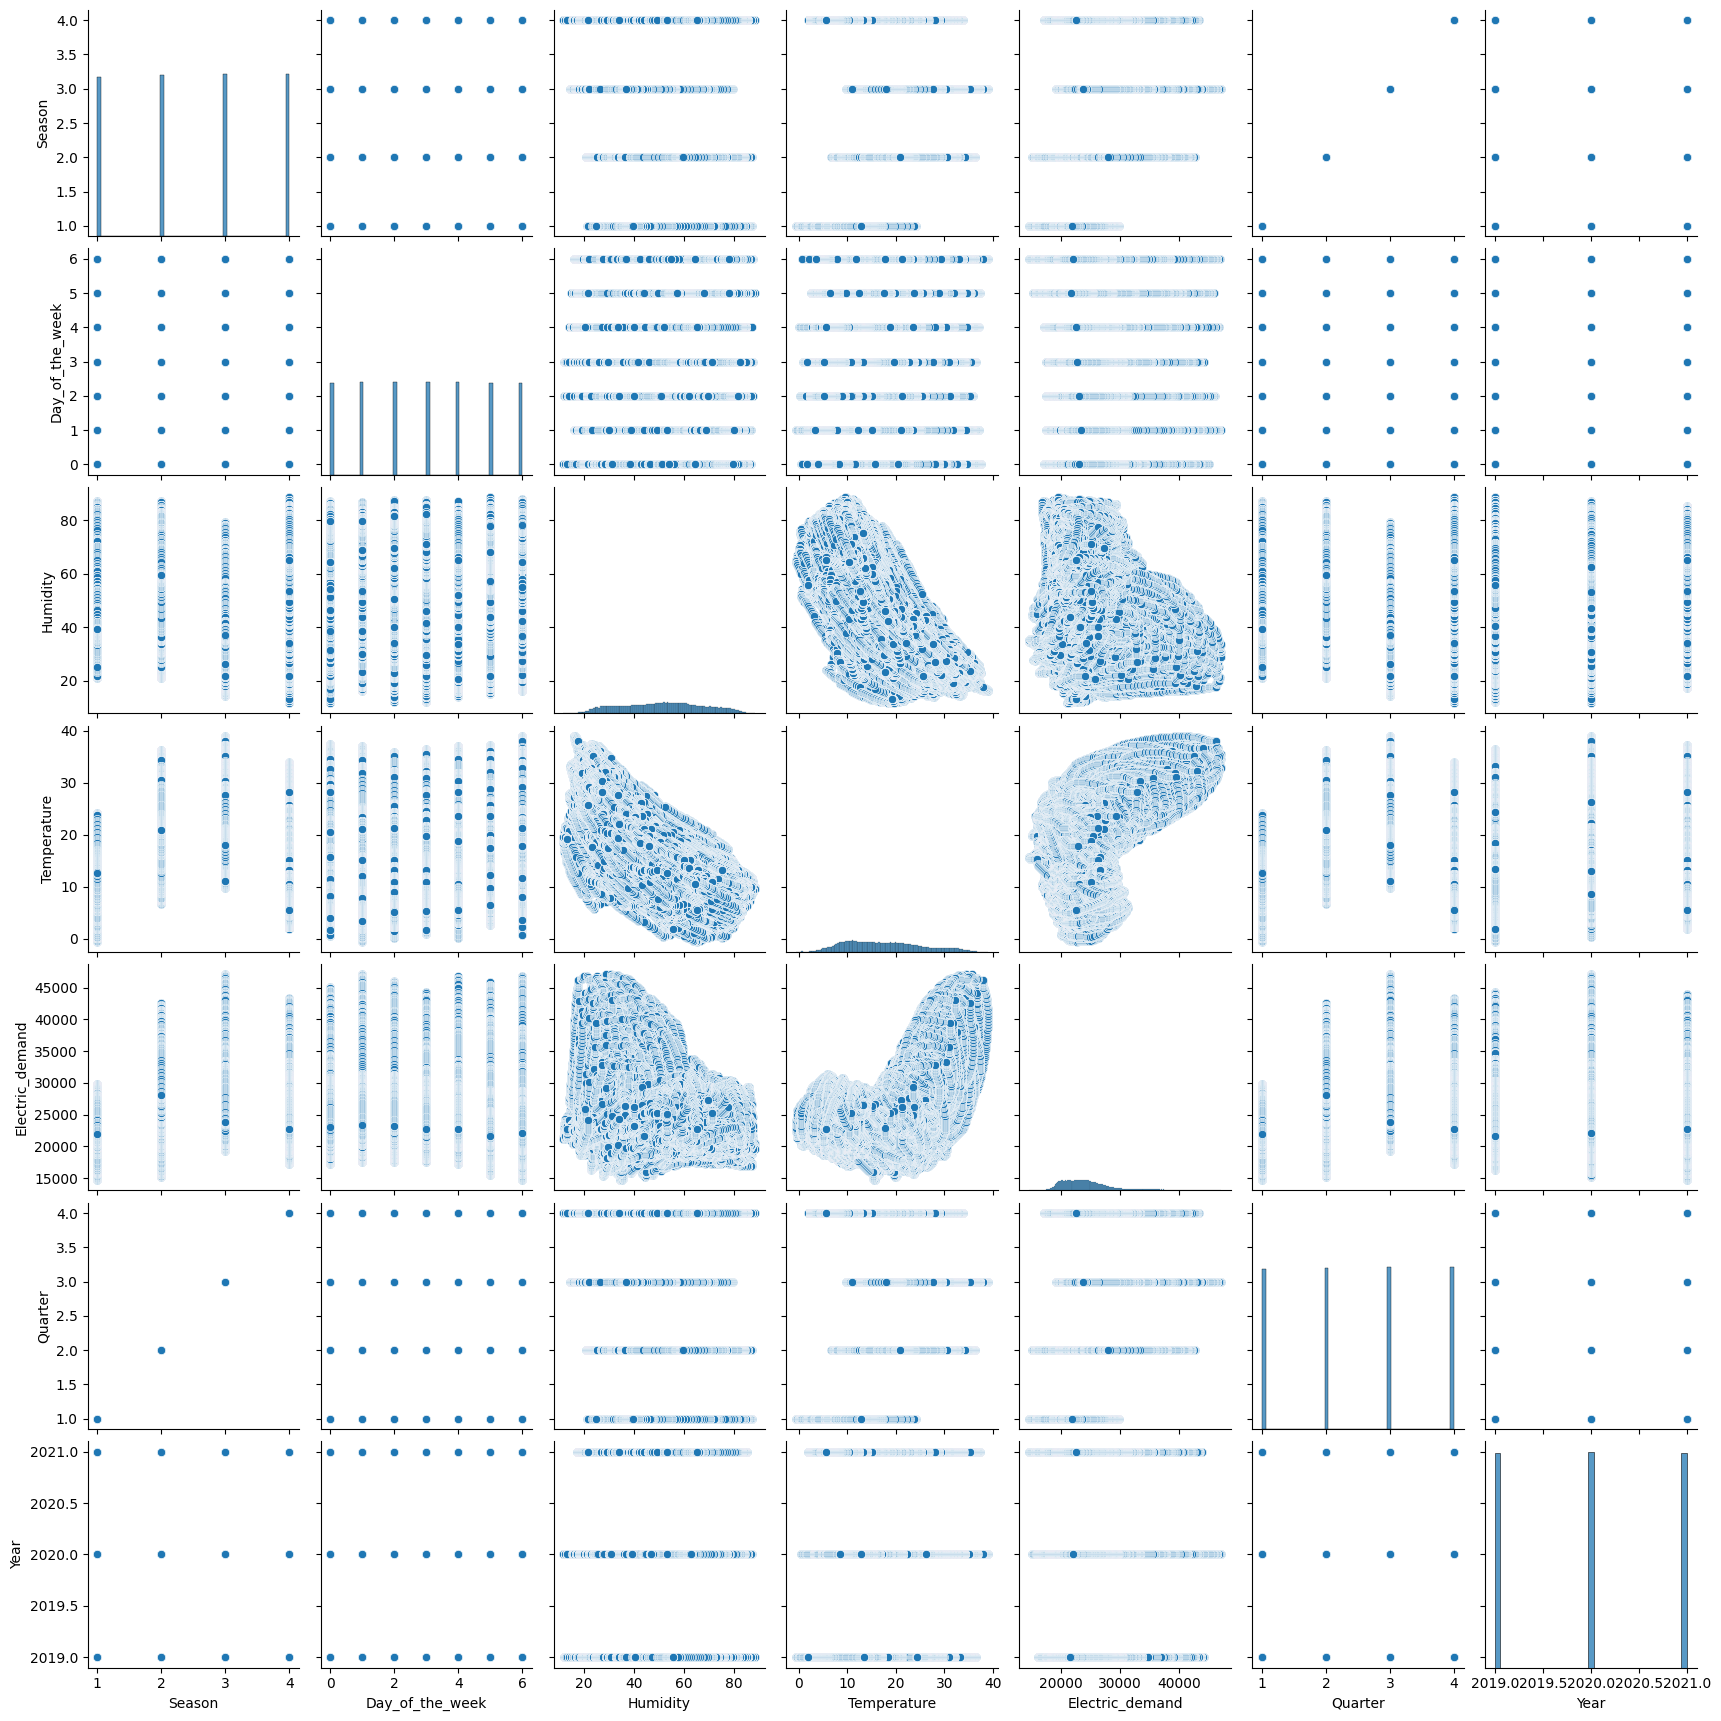

In [27]:
sns.pairplot(df)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

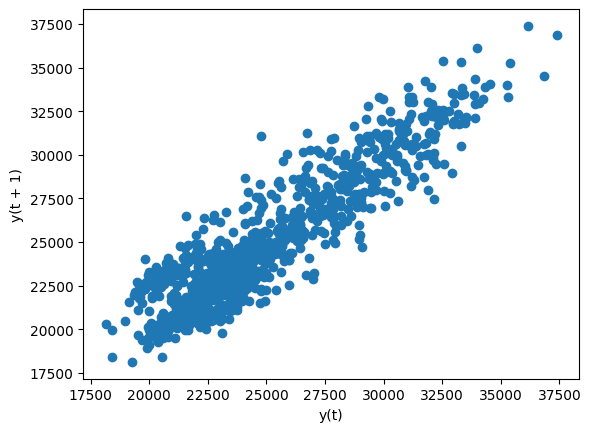

In [28]:
lag_plot(y)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

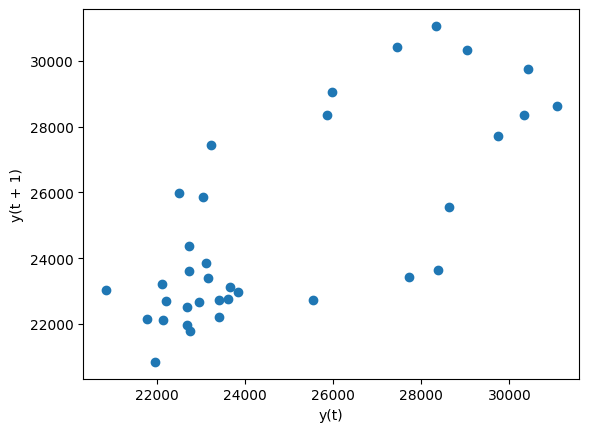

In [29]:
z = df['Electric_demand'].resample('MS').mean()

lag_plot(z)

### 6. ETS decomposition

In [30]:
df_resampled = df.resample('D').mean()

In [31]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2019-01-01 to 2021-12-31
Freq: D
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           1096 non-null   float64
 1   Day_of_the_week  1096 non-null   float64
 2   Humidity         1096 non-null   float64
 3   Temperature      1096 non-null   float64
 4   Electric_demand  1096 non-null   float64
 5   Quarter          1096 non-null   float64
 6   Year             1096 non-null   float64
dtypes: float64(7)
memory usage: 68.5 KB


In [32]:
df_resampled.isna().sum()

Season             0
Day_of_the_week    0
Humidity           0
Temperature        0
Electric_demand    0
Quarter            0
Year               0
dtype: int64

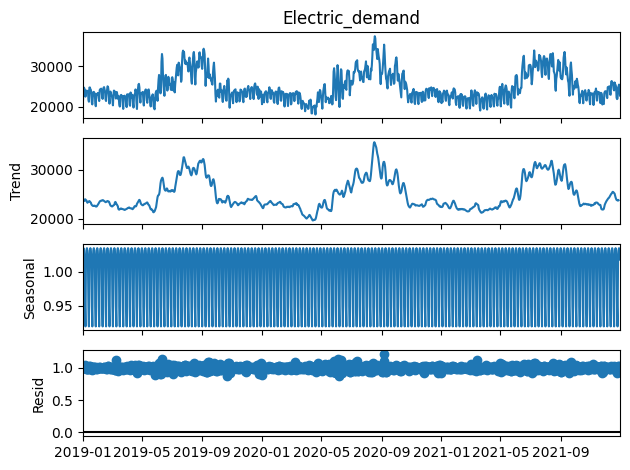

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mult = seasonal_decompose(df_resampled['Electric_demand'], model='multiplicative')
result_mult.plot();

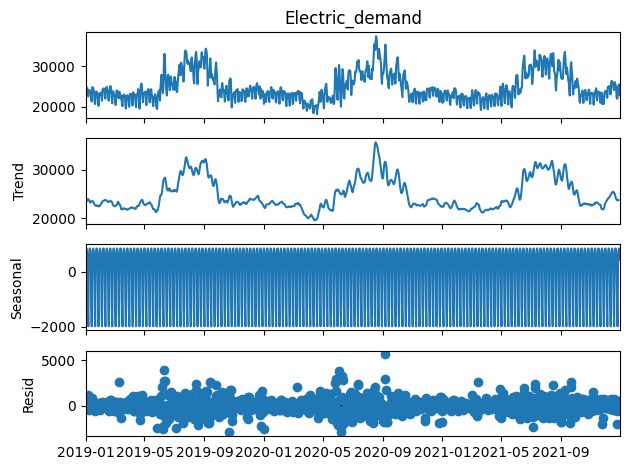

In [34]:
result_add = seasonal_decompose(df_resampled['Electric_demand'], model='additive')
result_add.plot();

### 7. Test for stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller, kpss

In [36]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [37]:
adf_test(df_resampled['Electric_demand'], 'Daily Electric Demand from 2019 to 2021')

Augmented Dickey-Fuller Test: Daily Electric Demand from 2019 to 2021
ADF test statistic        -2.554782
p-value                    0.102708
# lags used               22.000000
# observations          1073.000000
critical value (1%)       -3.436459
critical value (5%)       -2.864237
critical value (10%)      -2.568206
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [38]:
kpss_test = kpss(df_resampled['Electric_demand'], regression='c')

statistic, p_value, n_lags, critical_values = kpss_test

print(f'KPSS Statistic: {statistic}')
print(f'P-Value: {p_value}')
print(f'Number of Lags Used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')

alpha = 0.05
if p_value > alpha:
    print('The null hypothesis cannot be rejected (The series is stationary)')
else:
    print('The null hypothesis can be rejected (The series is not stationary)')

KPSS Statistic: 0.1745260750123507
P-Value: 0.1
Number of Lags Used: 19
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The null hypothesis cannot be rejected (The series is stationary)


C:\Users\fmiranda\AppData\Local\Temp\ipykernel_14344\3370938633.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df_resampled['Electric_demand'], regression='c')


In [39]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(df_resampled['Electric_demand'])

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.165
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [40]:
df_diff = df_resampled['Electric_demand'].diff().dropna()

In [41]:
adf_test(df_diff, 'Daily Electric Demand from 2019 to 2021')

Augmented Dickey-Fuller Test: Daily Electric Demand from 2019 to 2021
ADF test statistic     -8.151553e+00
p-value                 9.665484e-13
# lags used             2.100000e+01
# observations          1.073000e+03
critical value (1%)    -3.436459e+00
critical value (5%)    -2.864237e+00
critical value (10%)   -2.568206e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [42]:
kpss_test = kpss(df_diff, regression='c')

statistic, p_value, n_lags, critical_values = kpss_test

print(f'KPSS Statistic: {statistic}')
print(f'P-Value: {p_value}')
print(f'Number of Lags Used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')

alpha = 0.05
if p_value > alpha:
    print('The null hypothesis cannot be rejected (The series is stationary)')
else:
    print('The null hypothesis can be rejected (The series is not stationary)')

KPSS Statistic: 0.31586324949117855
P-Value: 0.1
Number of Lags Used: 396
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The null hypothesis cannot be rejected (The series is stationary)


C:\Users\fmiranda\AppData\Local\Temp\ipykernel_14344\1175468969.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df_diff, regression='c')


In [43]:
pp_test = PhillipsPerron(df_diff)

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.813
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [44]:
df_resampled_new = df_resampled.iloc[1:]

df_diff = df_diff.to_frame()
df_diff = df_diff.join(df_resampled_new[['Season', 'Day_of_the_week', 'Humidity', 'Temperature', 'Quarter', 'Year']])

df_diff.head()

,Electric_demand,Season,Day_of_the_week,Humidity,Temperature,Quarter,Year
Time,,,,,,,
2019-01-02,2322.149306,1.0,2.0,47.949458,7.277847,1.0,2019.0
2019-01-03,617.232639,1.0,3.0,51.266278,8.870486,1.0,2019.0
2019-01-04,-319.034722,1.0,4.0,54.152569,9.181111,1.0,2019.0
2019-01-05,-570.572917,1.0,5.0,66.418194,8.931528,1.0,2019.0
2019-01-06,-1330.236111,1.0,6.0,75.564007,8.208681,1.0,2019.0


In [45]:
df_diff.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Time', length=1095, freq='D')

### 8. ACF and PACF

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

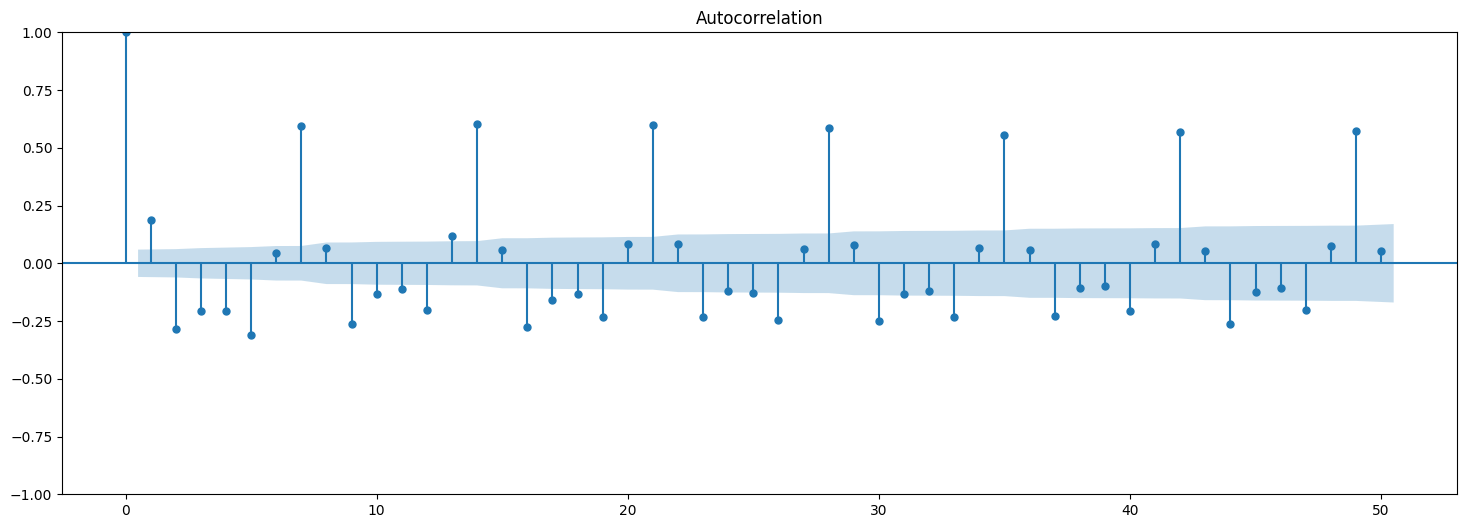

In [47]:
y = df_diff['Electric_demand']

fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))

plot_acf(y, lags=50, ax=ax1);

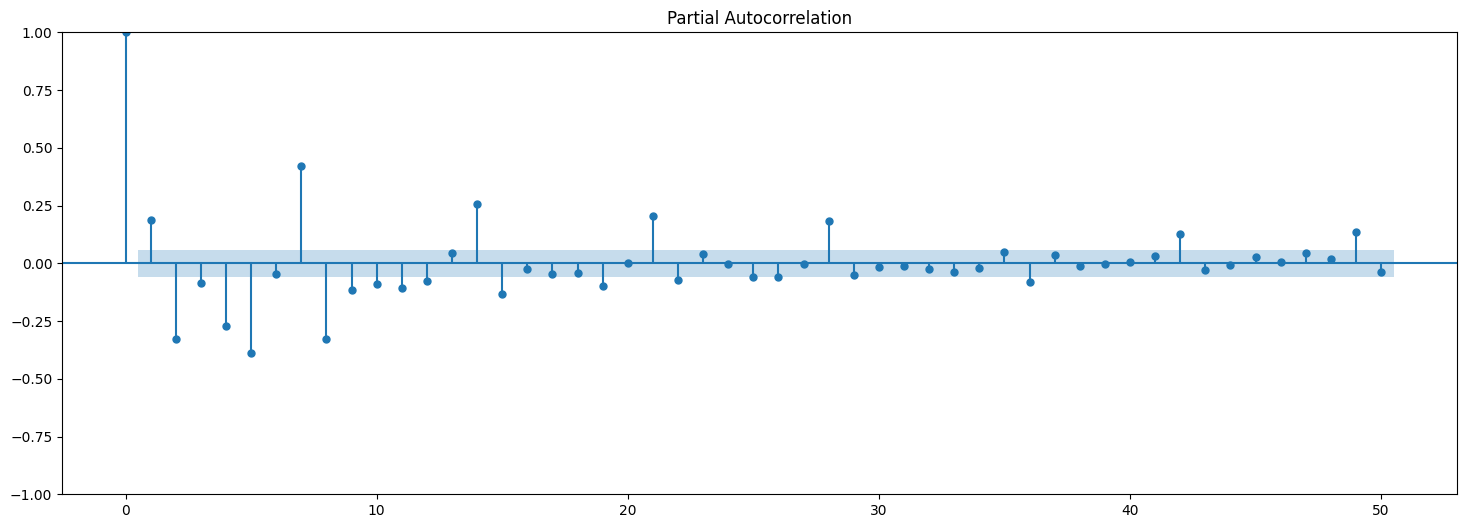

In [48]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))

plot_pacf(y, lags=50, ax=ax1);

### 9. Choose SARIMAX parameters

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import warnings

warnings.filterwarnings('ignore')

best_aic = np.inf 
best_order = None
exog = df_diff[['Temperature', 'Humidity']]

for p in range(3):
    for q in range(3):
        for Ps in range(3):
            for Qs in range(3):
                try:
                    model = SARIMAX(df_diff['Electric_demand'].dropna(), exog=exog, order=(p, 0, q), seasonal_order=(Ps, 0, Qs, 7))
                    model_fit = model.fit(disp=0)
                    print('SARIMAX {} x {}7 - AIC:{}'.format((p, 0, q), (Ps, 0, Qs), model_fit.aic))
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        # print('SARIMAX {} x {}7 - AIC:{}'.format((p, 0, q), (Ps, 0, Qs), model_fit.aic))
                        best_order = (p, 0, q, Ps, 0, Qs, 7, model_fit.aic)
                except:
                    continue

SARIMAX (0, 0, 0) x (0, 0, 0)7 - AIC:19096.249158319195
SARIMAX (0, 0, 0) x (0, 0, 1)7 - AIC:18826.999684687195
SARIMAX (0, 0, 0) x (0, 0, 2)7 - AIC:18688.974855944445
SARIMAX (0, 0, 0) x (1, 0, 0)7 - AIC:18578.906925770305
SARIMAX (0, 0, 0) x (1, 0, 1)7 - AIC:18141.081113540644
SARIMAX (0, 0, 0) x (1, 0, 2)7 - AIC:18142.481101774036
SARIMAX (0, 0, 0) x (2, 0, 0)7 - AIC:18389.19536808409
SARIMAX (0, 0, 0) x (2, 0, 1)7 - AIC:18163.53940898473
SARIMAX (0, 0, 0) x (2, 0, 2)7 - AIC:18162.549334785712
SARIMAX (0, 0, 1) x (0, 0, 0)7 - AIC:19016.759357509058
SARIMAX (0, 0, 1) x (0, 0, 1)7 - AIC:18724.848674868583
SARIMAX (0, 0, 1) x (0, 0, 2)7 - AIC:18588.43877722745
SARIMAX (0, 0, 1) x (1, 0, 0)7 - AIC:18464.919372871092
SARIMAX (0, 0, 1) x (1, 0, 1)7 - AIC:18029.143040936848
SARIMAX (0, 0, 1) x (1, 0, 2)7 - AIC:18040.809966327353
SARIMAX (0, 0, 1) x (2, 0, 0)7 - AIC:18298.0217299695
SARIMAX (0, 0, 1) x (2, 0, 1)7 - AIC:18141.84796804458
SARIMAX (0, 0, 2) x (0, 0, 0)7 - AIC:18897.47409047358

In [54]:
print('Best SARIMAX order: ', best_order)

Best SARIMAX order:  (0, 0, 1, 1, 0, 1, 7, 18029.143040936848)


In [55]:
best_new_aic = np.inf 
best_new_order = None

for p in range(3,7):
    for q in range(3,7):
        for Ps in range(3,7):
            for Qs in range(3,7):
                try:
                    model = SARIMAX(df_diff['Electric_demand'].dropna(), exog=exog, order=(p, 0, q), seasonal_order=(Ps, 0, Qs, 7))
                    model_fit = model.fit(disp=0)
                    print('SARIMAX {} x {}7 - AIC:{}'.format((p, 0, q), (Ps, 0, Qs), model_fit.aic))
                    if model_fit.aic < best_new_aic:
                        best_new_aic = model_fit.aic
                        # print('SARIMAX {} x {}7 - AIC:{}'.format((p, 0, q), (Ps, 0, Qs), model_fit.aic))
                        best_new_order = (p, 0, q, Ps, 0, Qs, 7, model_fit.aic)
                except:
                    continue

SARIMAX (3, 0, 3) x (3, 0, 3)7 - AIC:18232.765189795304
SARIMAX (3, 0, 3) x (3, 0, 4)7 - AIC:18234.071521787166
SARIMAX (3, 0, 3) x (3, 0, 5)7 - AIC:18236.512702367
SARIMAX (3, 0, 3) x (3, 0, 6)7 - AIC:18237.594600346398
SARIMAX (3, 0, 3) x (4, 0, 3)7 - AIC:18234.51227196354
SARIMAX (3, 0, 3) x (4, 0, 4)7 - AIC:18234.492973108216
SARIMAX (3, 0, 3) x (4, 0, 5)7 - AIC:18237.655549076313
SARIMAX (3, 0, 3) x (4, 0, 6)7 - AIC:18236.51609355796
SARIMAX (3, 0, 3) x (5, 0, 3)7 - AIC:18237.993237451694
SARIMAX (3, 0, 3) x (5, 0, 4)7 - AIC:18236.92160651415
SARIMAX (3, 0, 3) x (5, 0, 5)7 - AIC:18238.611856054216
SARIMAX (3, 0, 3) x (5, 0, 6)7 - AIC:18240.002894456746
SARIMAX (3, 0, 3) x (6, 0, 3)7 - AIC:18237.802832588735
SARIMAX (3, 0, 3) x (6, 0, 4)7 - AIC:18237.386077761104
SARIMAX (3, 0, 3) x (6, 0, 5)7 - AIC:18239.636161017093
SARIMAX (3, 0, 3) x (6, 0, 6)7 - AIC:18242.742928412707
SARIMAX (3, 0, 4) x (3, 0, 3)7 - AIC:18283.929756832073
SARIMAX (3, 0, 4) x (3, 0, 4)7 - AIC:18284.07591717425

In [56]:
print('Best SARIMAX order: ', best_order)
print()
print('Best new SARIMAX order: ', best_new_order)

Best SARIMAX order:  (0, 0, 1, 1, 0, 1, 7, 18029.143040936848)

Best new SARIMAX order:  (4, 0, 3, 3, 0, 4, 7, 18027.648256009772)


In [58]:
if best_aic < best_new_aic:
    print(best_order)
else:
    print(best_new_order)

(4, 0, 3, 3, 0, 4, 7, 18027.648256009772)


### 10. Split dataset

In [69]:
train_data_diff, test_data_diff = df_diff[0:int(len(df_diff)*0.8)], df_diff[int(len(df_diff)*0.8):]

### 11. Train SARIMAX model

In [72]:
exog_train = train_data_diff[['Temperature', 'Humidity']]

model = SARIMAX(train_data_diff['Electric_demand'], order=(4,0,3), seasonal_order=(3,0,4,7), exog=exog_train)
model_fit = model.fit(disp=0)

### 12. Predict test data

In [92]:
df_diff.head()

,Electric_demand,Season,Day_of_the_week,Humidity,Temperature,Quarter,Year
Time,,,,,,,
2019-01-02,2322.149306,1.0,2.0,47.949458,7.277847,1.0,2019.0
2019-01-03,617.232639,1.0,3.0,51.266278,8.870486,1.0,2019.0
2019-01-04,-319.034722,1.0,4.0,54.152569,9.181111,1.0,2019.0
2019-01-05,-570.572917,1.0,5.0,66.418194,8.931528,1.0,2019.0
2019-01-06,-1330.236111,1.0,6.0,75.564007,8.208681,1.0,2019.0


In [93]:
df_diff.tail()

,Electric_demand,Season,Day_of_the_week,Humidity,Temperature,Quarter,Year
Time,,,,,,,
2021-12-27,2517.906250,4.0,0.0,73.086701,5.753611,4.0,2021.0
2021-12-28,503.954861,4.0,1.0,74.636688,5.125486,4.0,2021.0
2021-12-29,428.017361,4.0,2.0,75.872736,5.903333,4.0,2021.0
2021-12-30,-1105.659722,4.0,3.0,76.542681,7.446667,4.0,2021.0
2021-12-31,-1589.517361,4.0,4.0,70.781917,7.563681,4.0,2021.0


In [94]:
len(df_diff)

1095

In [100]:
start_index = len(train_data_diff)
end_index = start_index + len(test_data_diff) - 1

In [104]:
exog_test = test_data_diff[['Temperature', 'Humidity']]

predictions = model_fit.predict(start=start_index, end=end_index, exog=exog_test)

### 13. Inverse transformations

In [105]:
predictions.head()

2021-05-27    -504.943014
2021-05-28    -606.553642
2021-05-29   -1894.109246
2021-05-30    -821.372915
2021-05-31    2449.925578
Freq: D, Name: predicted_mean, dtype: float64

In [106]:
predictions.tail()

2021-12-27    2251.512839
2021-12-28     385.045105
2021-12-29      43.996483
2021-12-30    -143.010212
2021-12-31    -397.488670
Freq: D, Name: predicted_mean, dtype: float64

In [107]:
predictions_inv = df_resampled['Electric_demand'].iloc[train_data_diff.shape[0]-1] + predictions.cumsum()

In [109]:
predictions_inv.head()

2021-05-27    24621.692403
2021-05-28    24015.138761
2021-05-29    22121.029515
2021-05-30    21299.656600
2021-05-31    23749.582179
Freq: D, Name: predicted_mean, dtype: float64

In [110]:
predictions_inv.tail()

2021-12-27    29015.021608
2021-12-28    29400.066713
2021-12-29    29444.063195
2021-12-30    29301.052983
2021-12-31    28903.564313
Freq: D, Name: predicted_mean, dtype: float64

### 14. Visualize predictions

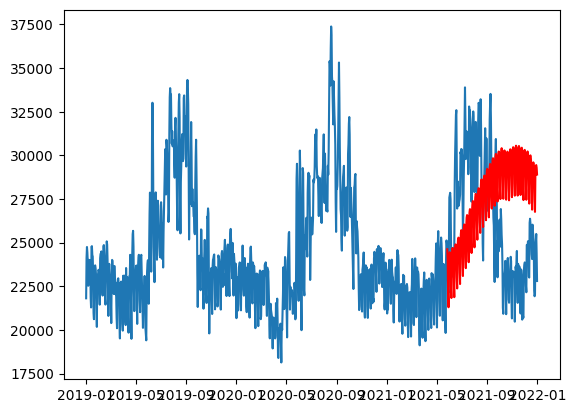

In [112]:
plt.plot(df_resampled['Electric_demand'])
plt.plot(predictions_inv, color='red')

### 15. Evaluate model performance

In [114]:
len(df_resampled)

1096

In [115]:
len(predictions_inv)

219

In [122]:
df_resampled['Electric_demand'][-219:]

Time
2021-05-27    24455.493056
2021-05-28    24757.142361
2021-05-29    22336.090278
2021-05-30    22125.965278
2021-05-31    24700.812500
                  ...     
2021-12-27    24566.732639
2021-12-28    25070.687500
2021-12-29    25498.704861
2021-12-30    24393.045139
2021-12-31    22803.527778
Freq: D, Name: Electric_demand, Length: 219, dtype: float64

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import acf

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def mean_bias_error(y_true, y_pred): 
    return np.mean(y_true - y_pred)

def mean_forecast_error(y_true, y_pred): 
    return y_true - y_pred

y_true = df_resampled['Electric_demand'][-219:].values.flatten()
y_pred = predictions_inv.values.flatten()

print('MAE:', mean_absolute_error(y_true, y_pred))
print('MSE:', mean_squared_error(y_true, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MAPE:', mean_absolute_percentage_error(y_true, y_pred))
print('sMAPE:', smape(y_true, y_pred))
print('Bias:', np.mean(mean_forecast_error(y_true, y_pred)))
print('MBE:', mean_bias_error(y_true, y_pred))


MAE: 4329.025168581955
MSE: 23308734.883240677
RMSE: 4827.9120625007945
MAPE: 17.012452948950376
sMAPE: 16.083382158944367
Bias: -1189.0875973317343
MBE: -1189.0875973317343


### 16. Residual diagnostics

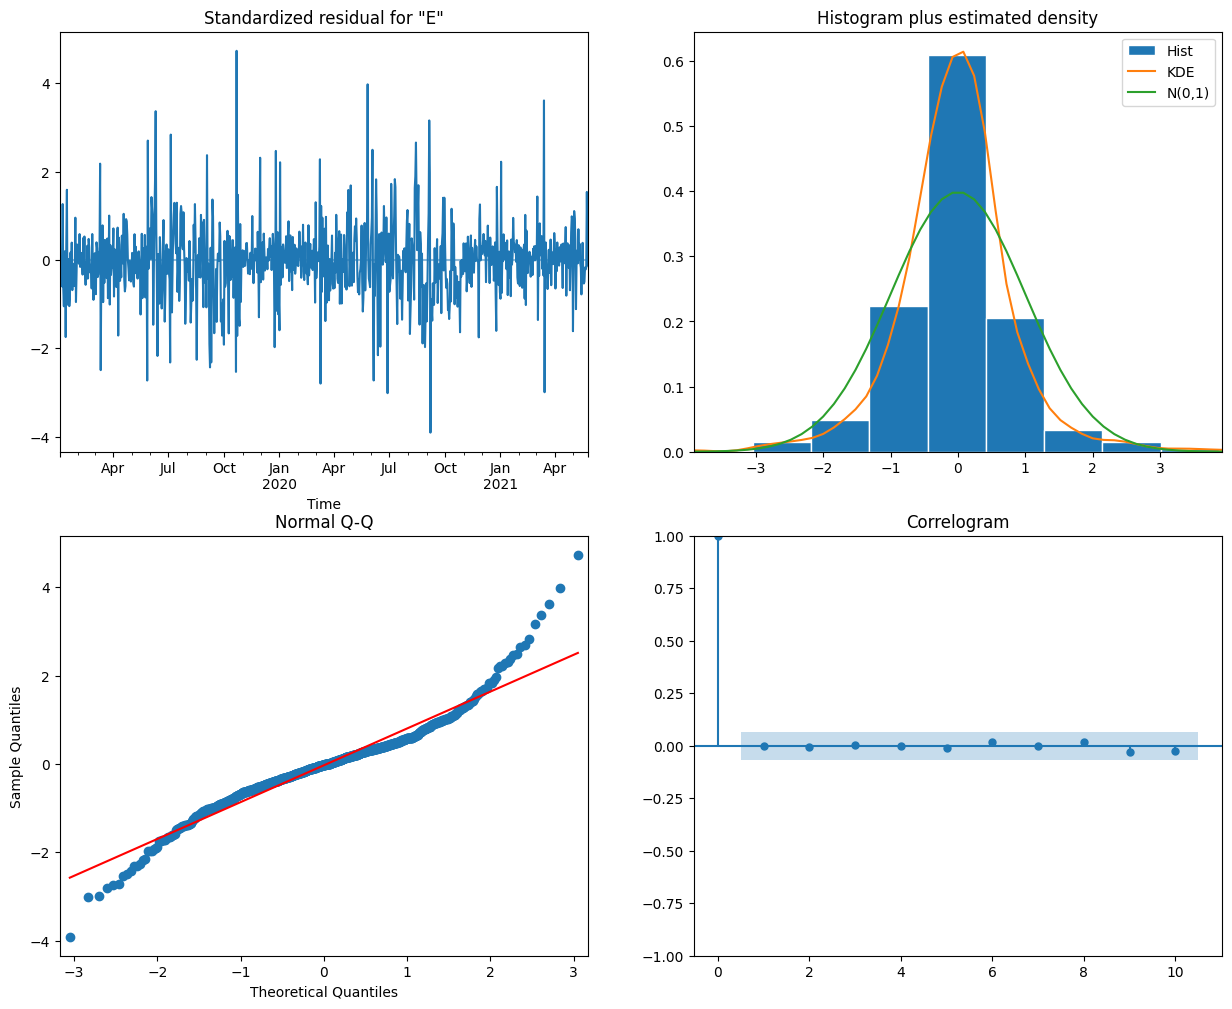

In [124]:
model_fit.plot_diagnostics(figsize=(15, 12));

### 17. Tune SARIMAX parameters with `auto_arima`

In [131]:
from pmdarima.arima import auto_arima

model = auto_arima(df_diff['Electric_demand'].dropna(), exogenous=exog, start_p=0, start_q=0, start_P=0, start_Q=0,
                   max_p=5, max_q=5, max_P=5, max_Q=5, d=0, D=0, m=7, trace=True, 
                   error_action='ignore', seasonal=True, suppress_warnings=True, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=19099.255, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=18839.165, Time=0.31 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=18709.858, Time=0.79 sec
 ARIMA(0,0,0)(0,0,3)[7] intercept   : AIC=18610.670, Time=1.60 sec
 ARIMA(0,0,0)(0,0,4)[7] intercept   : AIC=18541.990, Time=2.72 sec
 ARIMA(0,0,0)(0,0,5)[7] intercept   : AIC=18514.073, Time=5.44 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=18619.603, Time=0.27 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,0,0)(1,0,3)[7] intercept   : AIC=inf, Time=4.04 sec
 ARIMA(0,0,0)(1,0,4)[7] intercept   : AIC=inf, Time=7.78 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=18442.045, Time=0.81 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=4.37 sec
 ARIMA(0,0,0)(2,0,3)[7] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(0,0,0)(3,0,0)[7] intercept   :

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1095
Model:             SARIMAX(0, 0, 1)x(4, 0, [], 7)   Log Likelihood               -9095.304
Date:                            Thu, 08 Jun 2023   AIC                          18204.608
Time:                                    18:52:34   BIC                          18239.598
Sample:                                01-02-2019   HQIC                         18217.848
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4688     36.399     -0.013      0.990     -71.809      70.872
ma.L1          0.3264      0.023     14.369      0.000       0.282       0.371
ar.S.L7        0.2169      0.025      8.787      0.000       0.169       0.265
ar.S.L14       0.2117      0.026      8.283      0.000       0.162       0.262
ar.S.L21       0.2221      0.026      8.524      0.000       0.171       0.273
ar.S.L28       0.2126      0.026      8.155      0.000       0.162       0.264
sigma2      9.524e+05   2.86e+04     33.286      0.000    8.96e+05    1.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               295.75
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
new_model = model.fit(df_diff['Electric_demand'].dropna(), exogenous=exog)

In [161]:
new_forecast = new_model.predict(n_periods=len(df_diff))

In [162]:
new_forecast_inv = df_resampled['Electric_demand'].iloc[-1] + new_forecast.cumsum()

In [163]:
new_forecast_inv

2022-01-01    21770.184586
2022-01-02    21645.321449
2022-01-03    23881.150292
2022-01-04    23953.719830
2022-01-05    23923.154469
                  ...     
2024-12-26    10907.065820
2024-12-27    10903.454694
2024-12-28    10899.926949
2024-12-29    10896.488895
2024-12-30    10893.320980
Freq: D, Length: 1095, dtype: float64

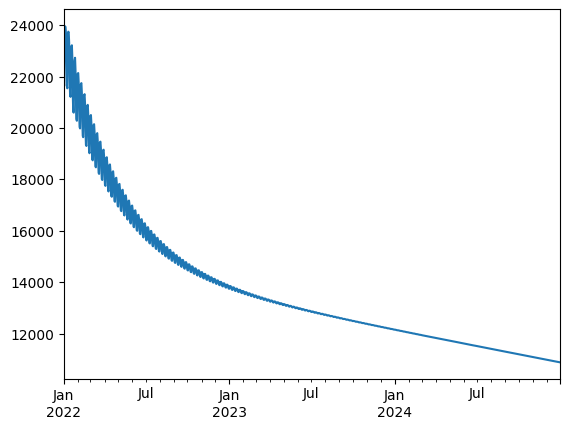

In [164]:
new_forecast_inv.plot();

### 18. Compare to other models

In [167]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

y = df_resampled['Electric_demand']

model = SimpleExpSmoothing(y)
model_fit = model.fit()
ses_forecast = model_fit.predict(start=0, end=len(df_diff))

model = Holt(y)
model_fit = model.fit()
holt_forecast = model_fit.predict(start=0, end=len(df_diff))

model = ExponentialSmoothing(y)
model_fit = model.fit()
hw_forecast = model_fit.predict(start=0, end=len(df_diff))

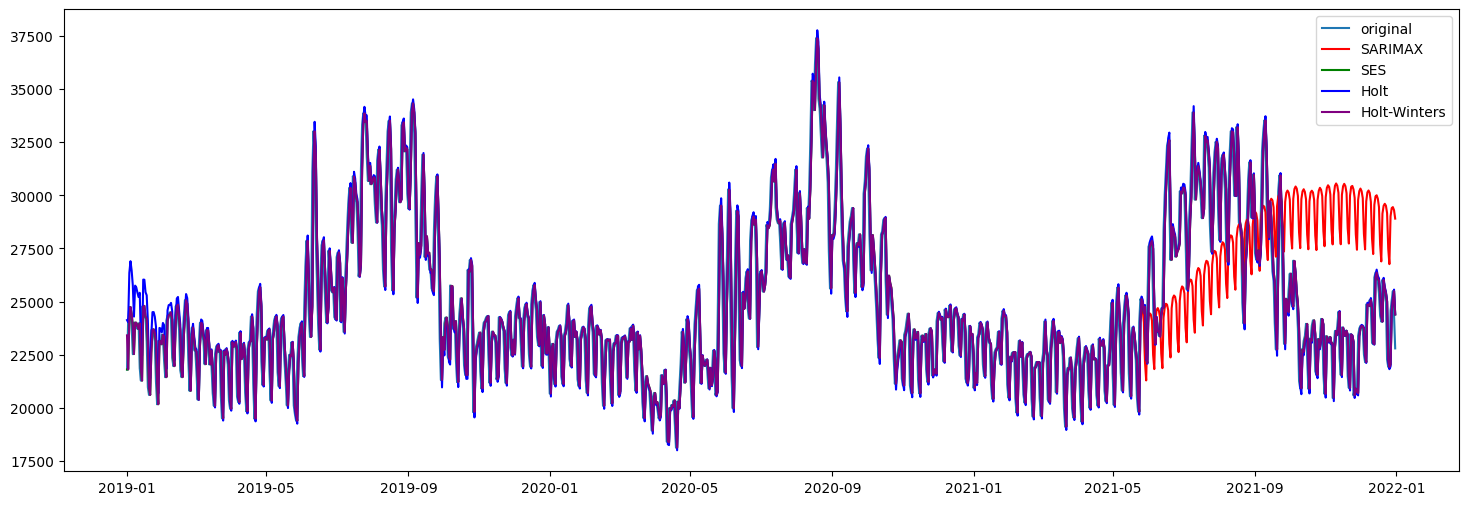

In [170]:
plt.figure(figsize=(18,6))
plt.plot(y, label='original')
plt.plot(predictions_inv, color='red', label='SARIMAX')
plt.plot(ses_forecast, color='green', label='SES')
plt.plot(holt_forecast, color='blue', label='Holt')
plt.plot(hw_forecast, color='purple', label='Holt-Winters')
plt.legend(loc='best')